## Binarizing images using global and local image thresholding approaches
<p>The Binarization Method converts the grey scale image (0 up to 256 gray levels) in to black and white image (0 or 1). The result of OCR highly depends upon the binarization. </p>
<p>The algorithms divide into two categories 
 - Global Binarization
 - Local Binarization.

<p>The global binarization methods used
single threshold value for whole image and the local binarization
method where the threshold value calculated locally pixel by
pixel or region by region.</p>

In [14]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def to_grayscale(img):
    '''This function converts RGB to Grayscale 0.3, 0.59, 0.11 are 
       the numbers selected according to wavelength of RGB.
    '''
    R=img[:,:,0]
    G=img[:,:,1]
    B=img[:,:,2]
    gray=((0.3 * R) + (0.59 * G) + (0.11 * B)).astype(np.int32)
    return gray

In [16]:
img=io.imread('Mandrill.tiff')
img=to_grayscale(img)

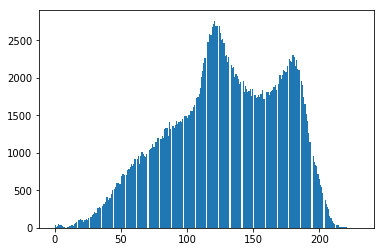

In [17]:
hist=plt.hist(img.ravel(),bins=256)

## Global Thresolding

In [18]:
thresold=np.mean(img)
img_global=np.copy(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if(img_global[i][j]<thresold):
            img_global[i][j]=0
        else: img_global[i][j]=1

## Local Thresolding

In [19]:
img_local=np.copy(img)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if(i%3==0 or j%3==0):
            temp_filter=img[i:i+3,j:j+3]
            local_thesold=(np.max(temp_filter)+np.min(temp_filter))/2
        if(img_local[i][j]<local_thesold):
            img_local[i][j]=0
        else: img_local[i][j]=1

Text(0.5,1,'local Thesolding')

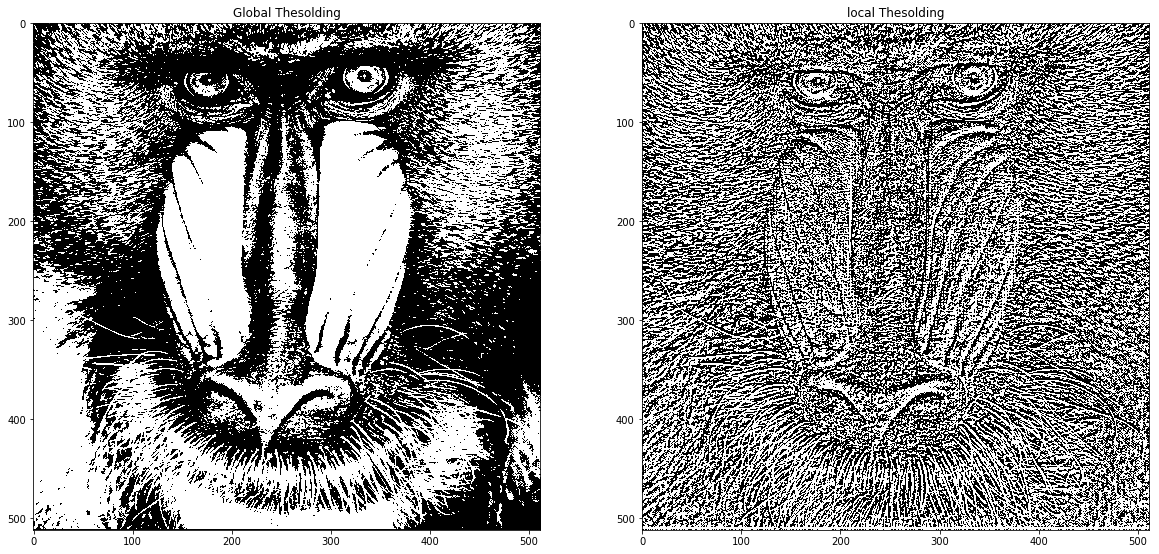

In [20]:
fig=plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img_global,cmap='gray')
plt.title('Global Thesolding')
plt.subplot(1,2,2)
plt.imshow(img_local,cmap='gray')
plt.title('local Thesolding')